In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from tensorflow import keras
import os

import numpy as np
import cv2
import tensorflow 
import keras  
import glob 
from skimage import io 
import random 
import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage import io 
import random 
from sklearn.metrics import classification_report, confusion_matrix  

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [ ]:
import keras  
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
from tensorflow.keras.optimizers import SGD


In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [ ]:
def visualize_layer_kernels(img, conv_layer, title):
    weights1 = conv_layer.get_weights()
    kernels = weights1[0]
    kernels_num = kernels.shape[3]
    f, ax = plt.subplots(kernels_num, 3, figsize=(7, kernels_num*2))

    for i in range(0, kernels_num):
        kernel=kernels[:,:,:3,i]
        ax[i][0].imshow((kernel * 255).astype(np.uint8), vmin=0, vmax=255)
        ax[i][0].set_title("Kernel %d" % i, fontsize = 9)
        ax[i][1].imshow((img * 255).astype(np.uint8), vmin=0, vmax=255)
        ax[i][1].set_title("Before", fontsize=8)
        img_filt = scipy.ndimage.filters.convolve(img, kernel)
        ax[i][2].imshow((img_filt * 255).astype(np.uint8), vmin=0, vmax=255)
        ax[i][2].set_title("After", fontsize=8)
        
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()   

In [ ]:
DATADIR = '/content/gdrive/MyDrive/Lego Bricks Prediction using Multiple Classifiers/dataset/archive/lego/'

# DATADIR = 'drive/My Drive/archive/lego'
CATEGORIES =["2357 Brick corner 1x2x2" , "3003 Brick 2x2" , "3004 Brick 1x2" , "3005 Brick 1x1" , "3022 Plate 2x2" , "3023 Plate 1x2" , "3024 Plate 1x1" , "3040 Roof Tile 1x2x45deg" , "3069 Flat Tile 1x2" , "3673 Peg 2M" , "3713 Bush for Cross Axle" , "3794 Plate 1X2 with 1 Knob" , "6632 Technic Lever 3M" , "11214 Bush 3M friction with Cross axle" , "18651 Cross Axle 2M with Snap friction" , "32123 half Bush"]

flat_data_arr=[] #input array
target_arr=[] #output array

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)   # create path to each class
    for img in os.listdir(path):    # iterate over each image per class
      try:
        img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        IMG_SIZE = 50
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize to normalize data size
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(CATEGORIES.index(category))   # get the classification  (0 or a 1). 0=dog 1=cat
      except Exception as e:  # in the interest in keeping the output clean...
                pass
    print(f'loaded category:{category} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data(features)  independent values
y=df.iloc[:,-1] #output data(labels)  dependent values      

loaded category:2357 Brick corner 1x2x2 successfully
loaded category:3003 Brick 2x2 successfully
loaded category:3004 Brick 1x2 successfully
loaded category:3005 Brick 1x1 successfully
loaded category:3022 Plate 2x2 successfully
loaded category:3023 Plate 1x2 successfully
loaded category:3024 Plate 1x1 successfully
loaded category:3040 Roof Tile 1x2x45deg successfully
loaded category:3069 Flat Tile 1x2 successfully
loaded category:3673 Peg 2M successfully
loaded category:3713 Bush for Cross Axle successfully
loaded category:3794 Plate 1X2 with 1 Knob successfully
loaded category:6632 Technic Lever 3M successfully
loaded category:11214 Bush 3M friction with Cross axle successfully
loaded category:18651 Cross Axle 2M with Snap friction successfully
loaded category:32123 half Bush successfully


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)  #feature , labels 
print('Splitted Successfully')

Splitted Successfully


In [ ]:
train_dir = '/content/gdrive/MyDrive/Lego Bricks Prediction using Multiple Classifiers/dataset/archive/lego/'
val_dir ='/content/gdrive/MyDrive/Lego Bricks Prediction using Multiple Classifiers/dataset/archive/lego/'


augs_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,validation_split=0.2)  

train_gen = augs_gen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=16,
    class_mode = 'categorical',
    shuffle=True
)

test_gen = augs_gen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 6379 images belonging to 16 classes.
Found 6379 images belonging to 16 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 separable_conv2d (Separable  (None, 146, 146, 32)     1344      
 Conv2D)                                                         
                                                                 
 batch_normalization (BatchN  (None, 146, 146, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                        

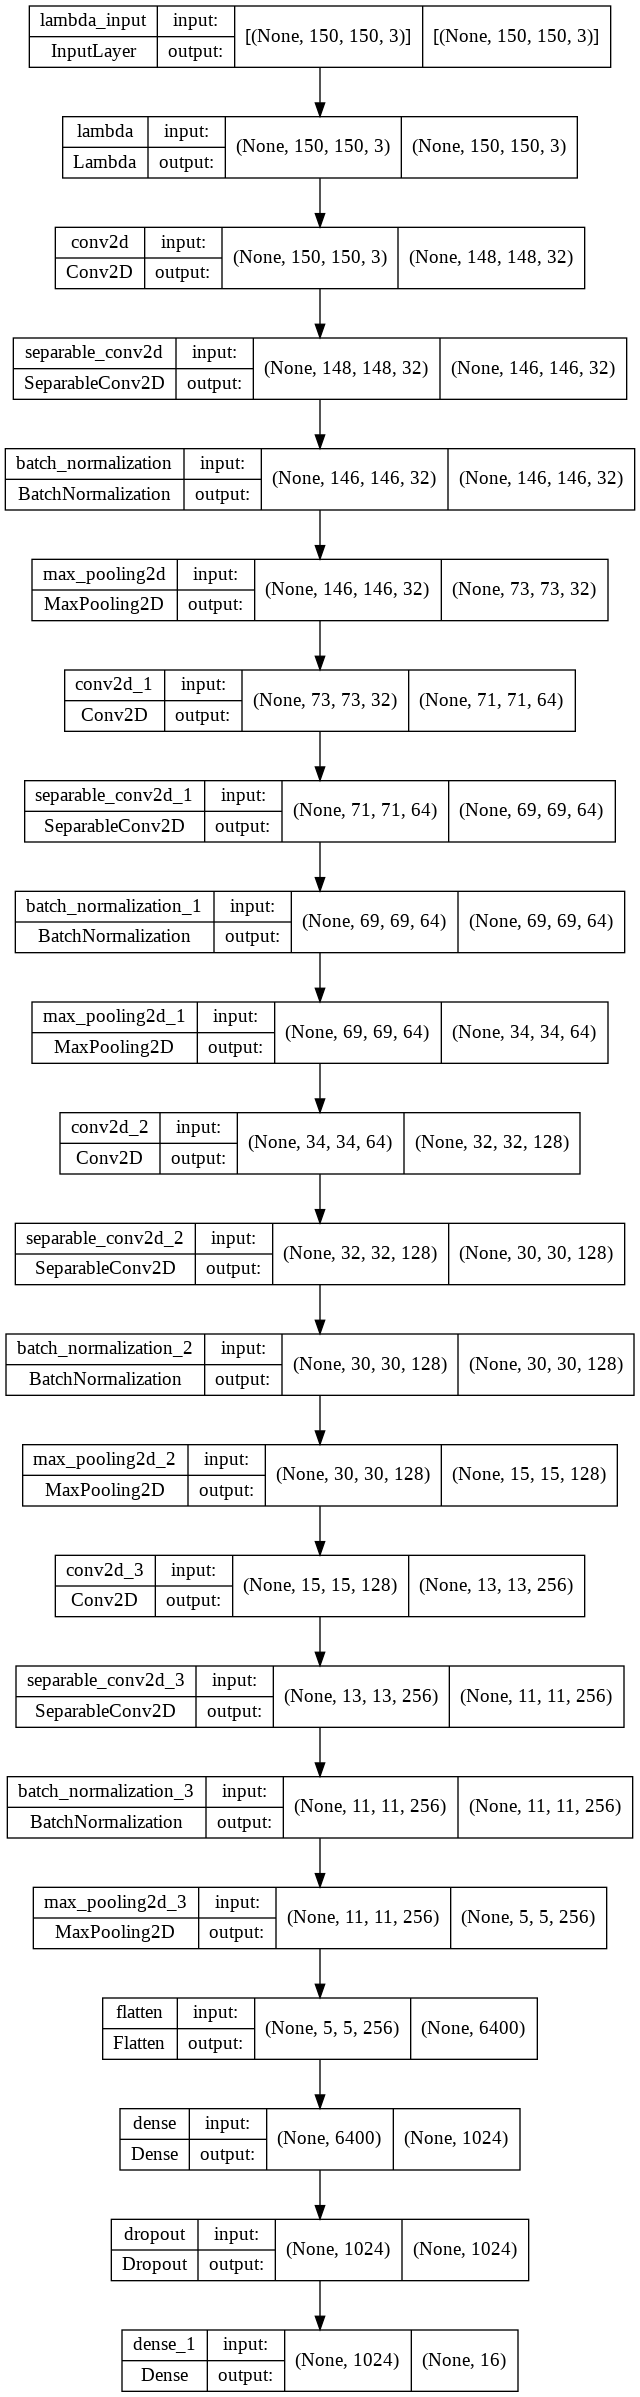

In [ ]:
def ConvBlock(model, layers, filters):
    for i in range(layers):
        model.add(Conv2D(filters,(3,3),activation='selu'))
        model.add(SeparableConv2D(filters, (3, 3), activation='selu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
def FCN():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(150, 150, 3)))
    ConvBlock(model, 1, 32)
    ConvBlock(model, 1, 64)
    ConvBlock(model, 1, 128)
    ConvBlock(model, 1, 256)
    model.add(Flatten())
    model.add(Dense(1024,activation='selu'))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation='softmax'))
    return model

model = FCN()
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
#-------Callbacks-------------#
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

#lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=40,
    verbose=1, 
    mode='auto',
    cooldown=1 
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=2e-4)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
    
history = model.fit_generator(
    train_gen, 
    steps_per_epoch  = 100, 
    validation_data  = test_gen,
    validation_steps = 100,
    epochs = 20, 
    verbose = 1,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.4694 - accuracy: 0.1081
Epoch 1: val_loss improved from inf to 0.50976, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
100/100 [==============================] - 227s 2s/step - loss: 0.4694 - accuracy: 0.1081 - val_loss: 0.5098 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.1994
Epoch 2: val_loss improved from 0.50976 to 0.29881, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
100/100 [==============================] - 220s 2s/step - loss: 0.2795 - accuracy: 0.1994 - val_loss: 0.2988 - val_accuracy: 0.1063 - lr: 1.0000e-04
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.2875
Epoch 3: val_loss improved from 0.29881 to 0.20908, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
100/10

In [ ]:
model.load_weights(best_model_weights)
model_score = model.evaluate_generator(test_gen)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Model Test Loss: 0.10758497565984726
Model Test Accuracy: 0.686627984046936
Weights Saved


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2022-06-07 11:31:43--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 52.202.168.65, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  18.7MB/s    in 0.7s    

2022-06-07 11:31:44 (18.7 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://11a6-35-185-240-168.ngrok.io
